# Report 2

The PAMAP2 Physical Activity Monitoring dataset contains data from 9 participants who participated in 18 various physical activities (such as walking, cycling, and soccer) while wearing three inertial measurement units and a heart rate monitor. The dataset can be used to identify and estimate activity intensity while creating and deploying data processing, segmentation, feature extraction, and classification algorithms.

The nature of physical activity can be categorized as aerobic activity promoting cardiovascular fitness or strength exercises promoting musculoskeletal fitness. Particularly in frail and elderly population, balanced activity of both types is important, on the one hand, for keeping functional independence, and on the other hand, as a basis for proper rehabilitation after a severe disease. It is then essential to promote the practice of physical activity especially at home, where adherence to exercise is demonstrably greater than when performed in centers, and where phase III rehabilitation takes place.

However, this physical activity has to be supervised in order to improve physical fitness whilst minimizing the risk of injury by incorrect execution or overuse. Moreover, this supervision of physical activity has to be achieved whilst providing feedback to the user, since this is required for preserving or increasing motivation and program adherence. The first integrated prototype of the PAMAP system provides this functionality for both categories of physical activity, thus supporting a holistic way of physical activity monitoring.



The goal of this project is to gather insights based on the findings of our analysis in order to establish how active an individual is based on physical activities that will be utilised to design hardware and software.
The following are the three requirements for this assignment:

Conduct a thorough exploratory data analysis and deal with missing or dirty data properly.

Develop and evaluate at least one hypothesis for a single pair of qualities' relationship.

Develop and test at least one model that makes predictions based on numerous attributes.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

In this section we will load the data from the data set. To load all of the files and generate the dataframe, a list of file names must be created. Furthermore, in order to understand which activity is being analysed at each phase, a dictionary containing the names as well as numbers of each separate activity must be constructed.
In order to have the column names for the dataframe, lists for each individual type of IMUs must also be created. IMUs for the chest, ankle, and hand will be employed.
Then all of the separate lists must be combined to make the column collection.

In [2]:
list_of_files = ['PAMAP2_Dataset/Protocol/subject101.dat',
                 'PAMAP2_Dataset/Protocol/subject102.dat',
                'PAMAP2_Dataset/Protocol/subject105.dat',
                 'PAMAP2_Dataset/Protocol/subject106.dat',
                 'PAMAP2_Dataset/Protocol/subject107.dat',
                 'PAMAP2_Dataset/Protocol/subject108.dat',
                 'PAMAP2_Dataset/Protocol/subject109.dat' ]


All of the files are being loaded into the list of files.

In [3]:
subjectID = [1,2,3,4,5,6,7,8,9]

In [4]:
activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

In [5]:
colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']


In [6]:
columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

In [7]:
len(columns)

54

In [8]:
dataCollection = pd.DataFrame()
for file in list_of_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    dataCollection = dataCollection.append(procData, ignore_index=True)

dataCollection.reset_index(drop=True, inplace=True)
data = dataCollection
data

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,1
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,1
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,1
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,1
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290119,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
2290120,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,9
2290121,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,9
2290122,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,9


As you can see from the sample of the dataframe we created, some data cleaning is necessary. For example, activityID 0 must be fully eliminated from our dataset because this is a temporary period during which the subject was not engaged in any specific activity, as described in the readme file that was provided. In the following section, we'll go over data cleaning in detail.Every NaN value in the column will be replaced with the column's mean value.


In [9]:
data = data.drop(data[data['activityID']==0].index)
data = data.interpolate()

According to the PerformedActivitiesSummary file, which is part of the collection of files provided, various data is missing, and as the readme file states, there were some wireless disconnections in data collection, so the missing data must be accounted for and made up in such a way that our data analysis will not be harmed. More specifically, each activity had 8 or fewer subjects participate in it, and each activity had NaN values for multiple subjects. As a result, some data filling has been done. In order to deal with the NaN values in our data, we should utilise interpolate, which creates a new data point from a group of known data points.
    As a general guideline for the code below, interpolation occurs after removing 'activity 0' because it contains very noisy and would-be data that would have a significant impact on the output because the values given in heart rate would not be produced from the data point set that contains activities that actually matter.

In [10]:
for colName in data.columns:
    data[colName] = data[colName].fillna(data[colName].mean())
    activity_mean = data.groupby(['activityID']).mean().reset_index()

In [11]:
data.isnull().sum()

timestamp            0
activityID           0
heartrate            0
handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3

The interpolation calculates the values around the nan cell, which is why HR still contains nan values. It's natural to generate new nan values after interpolation because the first cells are nan. To solve this problem, we can assume that the first four cells have a value of 100 because the values after the index 4 are all 100.

In [12]:
data.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,...,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06,1.537113e+06
mean,1.781060e+03,8.186963e+00,1.085994e+02,3.297722e+01,-4.845036e+00,3.525261e+00,3.497067e+00,-4.771644e+00,3.505999e+00,3.693539e+00,...,-3.432199e-02,3.462948e-03,-3.292821e+01,1.766320e+00,1.741788e+01,4.114858e-01,1.434574e-02,3.047490e-01,-3.138040e-02,4.829318e+00
std,1.134044e+03,6.227070e+00,2.797089e+01,1.796674e+00,6.373175e+00,7.530770e+00,4.071473e+00,6.370362e+00,7.178758e+00,4.054674e+00,...,6.808238e-01,2.097988e+00,1.863316e+01,2.256700e+01,2.015354e+01,3.184688e-01,5.612054e-01,3.366696e-01,4.548191e-01,2.546423e+00
min,3.120000e+01,1.000000e+00,6.000000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.521280e-06,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.000000e+00
25%,7.588100e+02,3.000000e+00,8.700000e+01,3.187500e+01,-8.892030e+00,7.906300e-01,9.953660e-01,-8.777300e+00,7.966750e-01,1.199930e+00,...,-1.046070e-01,-5.007460e-01,-4.249820e+01,-1.348970e+01,3.502280e+00,1.573300e-01,-5.530400e-01,0.000000e+00,-4.954040e-01,2.000000e+00
50%,1.627700e+03,6.000000e+00,1.040000e+02,3.356250e+01,-5.239850e+00,3.548050e+00,3.326030e+00,-5.142250e+00,3.584900e+00,3.559310e+00,...,-2.082700e-03,-2.225350e-03,-3.493810e+01,1.968840e+00,1.811090e+01,3.224850e-01,0.000000e+00,3.055630e-01,0.000000e+00,5.000000e+00
75%,2.818170e+03,1.300000e+01,1.250000e+02,3.425000e+01,-5.913350e-01,6.599720e+00,6.480290e+00,-4.892330e-01,6.594330e+00,6.745270e+00,...,1.567150e-01,1.204610e-01,-1.871990e+01,1.928230e+01,3.248150e+01,5.909250e-01,6.144540e-01,5.933510e-01,4.316260e-01,7.000000e+00
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,1.358820e+01,1.652880e+01,9.155160e+01,9.424780e+01,1.469000e+02,1.000000e+00,9.595380e-01,9.499800e-01,9.961050e-01,9.000000e+00


The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [13]:
# data['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
# plt.show()

### Exploratory Data Analysis

Data is split into two sets: train and test.
It is best to examine if the classes are balanced before separating our data, as this would indicate that stratification is not required for our split. If the weights of the classes are imbalanced, we should stratify the data while splitting it. Stratified sampling is the process of collecting samples from all classes and dividing them into sub-sets for training and testing. When the distribution of the weights of the classes is not normal, it aids in obtaining better outcomes. A normal distribution would imply that the weights of each class are similar to the weights of all other classes.

#### Analysis of the Balance

<ipython-input-14-1924e851b64a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(sampels_to_subject['subject_id'])
No handles with labels found to put in legend.


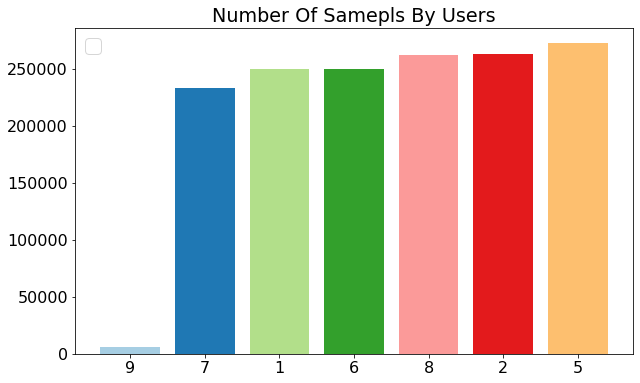

In [14]:
sampels = data.groupby(['subject_id']).count().reset_index()
sampels_to_subject = pd.DataFrame()
sampels_to_subject['subject_id'] = sampels['subject_id']
sampels_to_subject['sampels'] = sampels['timestamp']
sampels_to_subject = sampels_to_subject.sort_values(by=['sampels'])
plt.rcParams.update({'font.size': 16})
size = range(len(sampels_to_subject))
f, ax = plt.subplots(figsize=(10,6)) 
plt.bar(size, sampels_to_subject['sampels'], color=plt.cm.Paired(size))
a = ax.set_xticklabels(sampels_to_subject['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(sampels_to_subject)))
d = ax.set_title('Number Of Samepls By Users')

In comparison to other samples, Subject Id 9 contains very few samples, as shown in the graph above.

<ipython-input-15-cf3e8d012af6>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(sampels_to_subject['activity'])
No handles with labels found to put in legend.


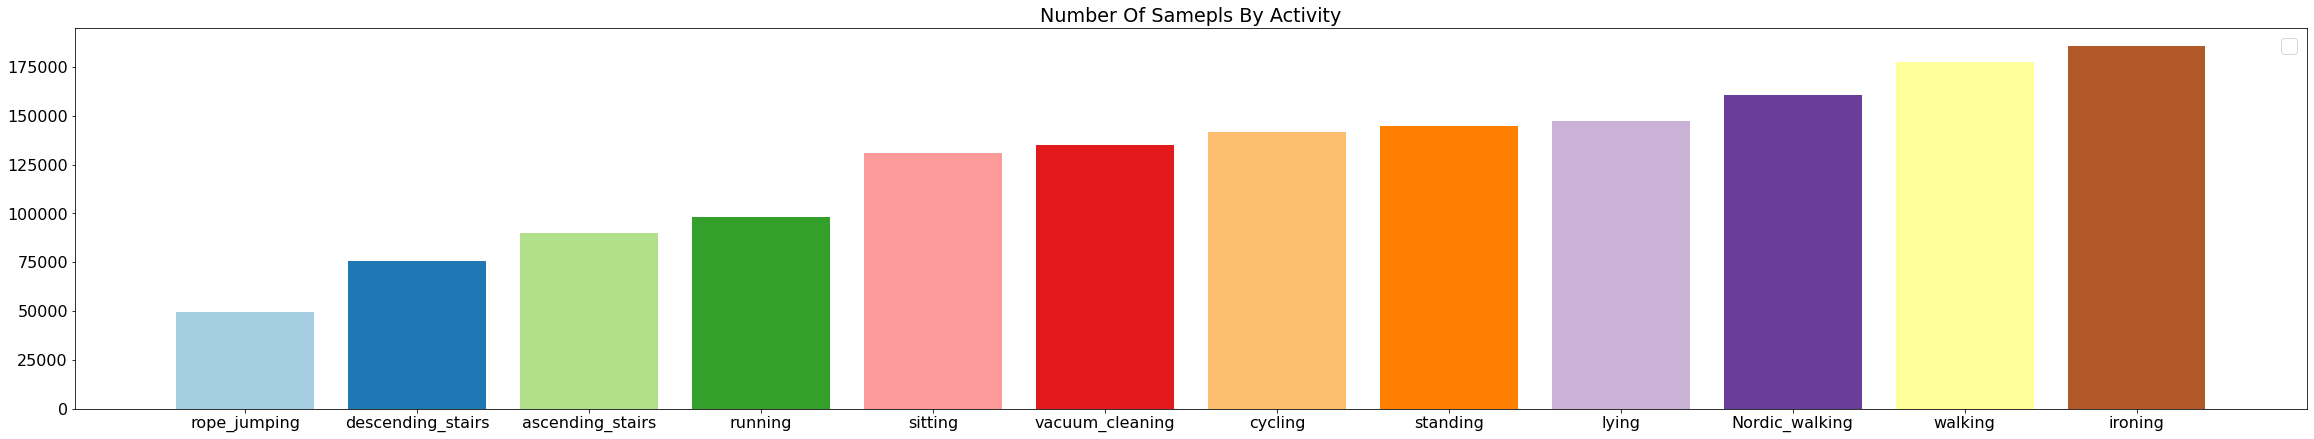

In [15]:
sampels = data.groupby(['activityID']).count().reset_index()
sampels_to_subject = pd.DataFrame()
sampels_to_subject['activity'] = [activityIDdict[x] for x in sampels['activityID']]
sampels_to_subject['sampels'] = sampels['timestamp']
sampels_to_subject = sampels_to_subject.sort_values(by=['sampels'])
plt.rcParams.update({'font.size': 16})
size = range(len(sampels_to_subject))
f, ax = plt.subplots(figsize=(40,7)) 
plt.bar(size, sampels_to_subject['sampels'], color=plt.cm.Paired(size))
a = ax.set_xticklabels(sampels_to_subject['activity'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(sampels_to_subject)))
d = ax.set_title('Number Of Samepls By Activity')
plt.show()

The data isn't balanced, as we can see:

Subject 9 has fewer samples than the rest of the subjects, and the rope jumping activity has less samples than the rest of the activities.

In [16]:
sampels_to_subject

,activity,sampels
11,rope_jumping,49360
8,descending_stairs,75384
7,ascending_stairs,90133
4,running,98198
1,sitting,130935
9,vacuum_cleaning,134991
5,cycling,141901
2,standing,144692
0,lying,147432
6,Nordic_walking,160574


#### Heart Rate Anlysis

<ipython-input-17-7b691306d2b8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(sampels_heart_rate['subject_id'])
No handles with labels found to put in legend.


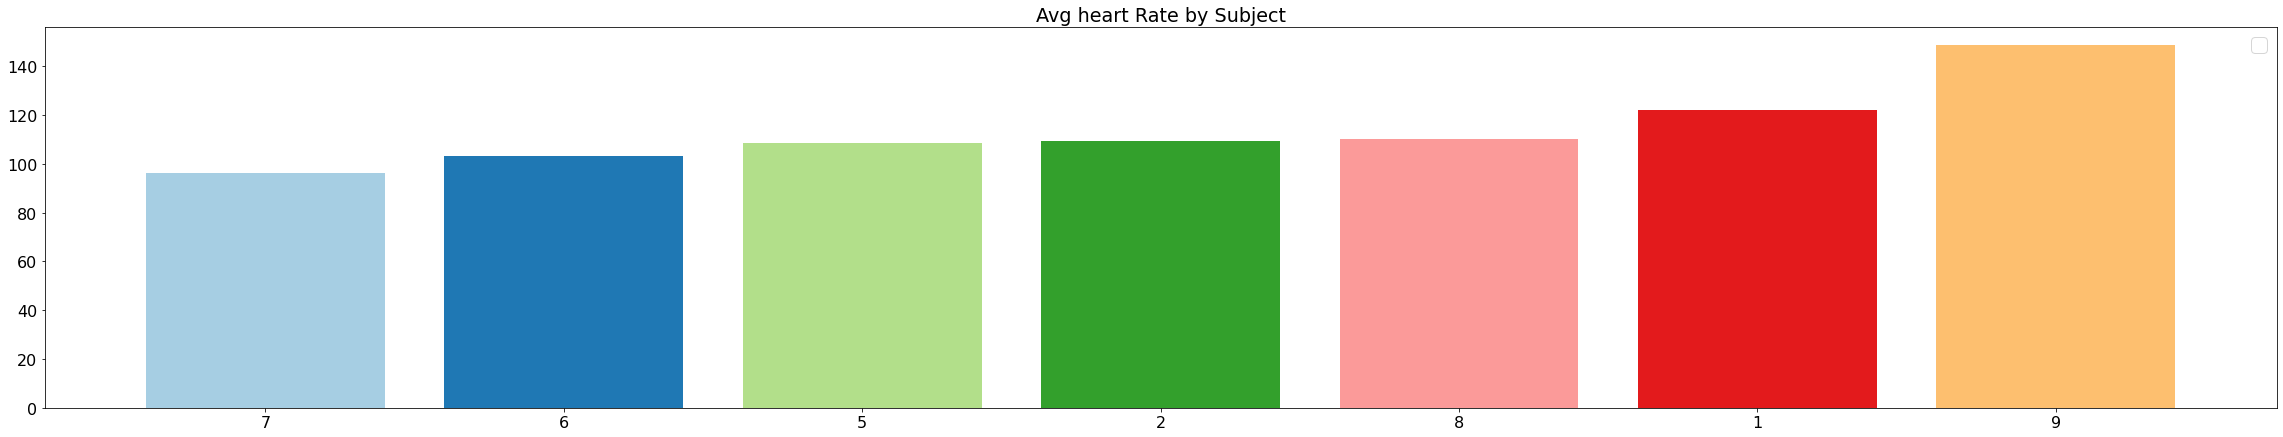

In [17]:
result_id = data.groupby(['subject_id']).mean().reset_index()
result_act = data.groupby(['activityID']).mean().reset_index()
sampels_heart_rate = pd.DataFrame()
sampels_heart_rate['subject_id'] = result_id['subject_id']
sampels_heart_rate['heartrate'] = result_id['heartrate']
sampels_heart_rate = sampels_heart_rate.sort_values(by=['heartrate'])
plt.rcParams.update({'font.size': 16})
size = range(len(sampels_heart_rate))
f, ax = plt.subplots(figsize=(40,7)) 
plt.bar(size, sampels_heart_rate['heartrate'], color=plt.cm.Paired(size))
a = ax.set_xticklabels(sampels_heart_rate['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(sampels_heart_rate)))
d = ax.set_title('Avg heart Rate by Subject')
plt.show()

In [18]:
sampels_heart_rate

,subject_id,heartrate
4,7,96.390682
3,6,103.001006
2,5,108.527291
1,2,109.492735
5,8,110.026446
0,1,122.190433
6,9,148.525960


According to heart rate study, subject id 9 has the highest heart rate of all the subjects.

<ipython-input-19-13b353a09b66>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(sampels_heart_rate['activity'])
No handles with labels found to put in legend.


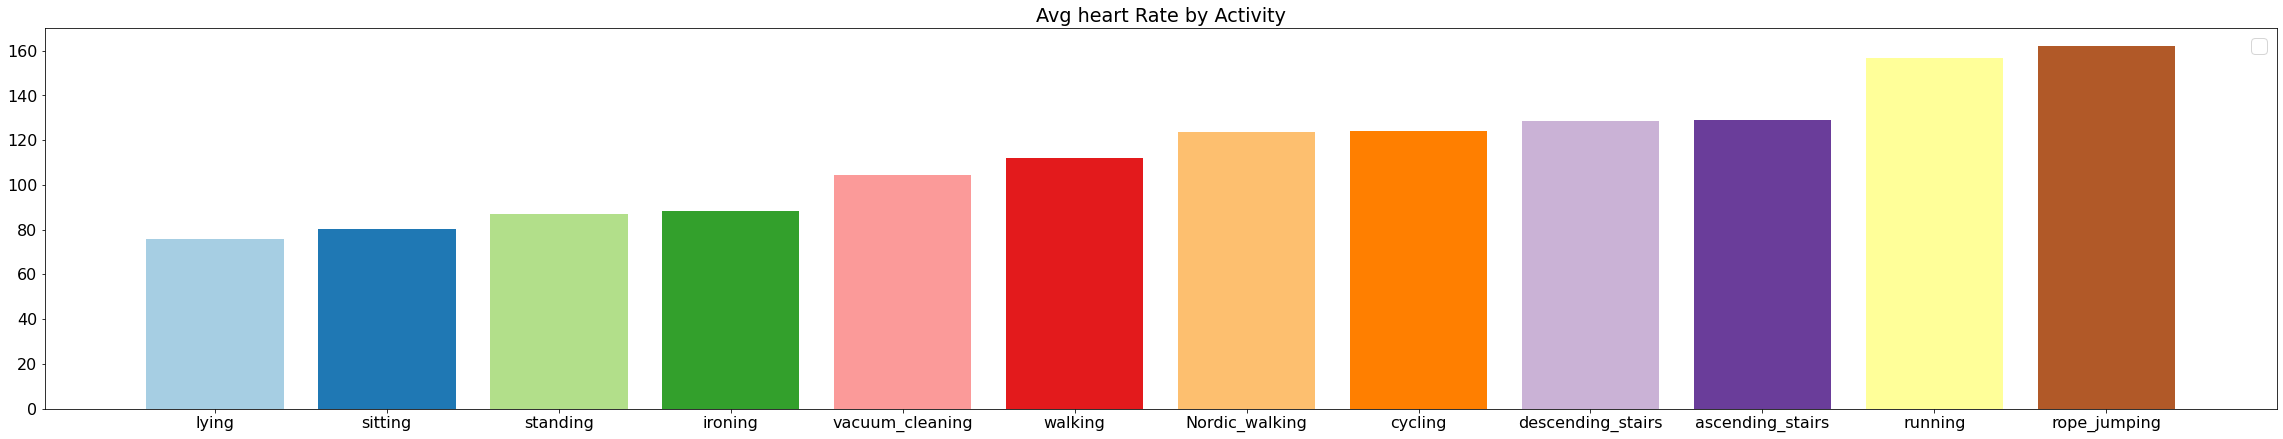

In [19]:
sampels_heart_rate = pd.DataFrame()
sampels_heart_rate['activity'] = [activityIDdict[x] for x in result_act['activityID']]
sampels_heart_rate['heartrate'] = result_act['heartrate']
sampels_heart_rate = sampels_heart_rate.sort_values(by=['heartrate'])
plt.rcParams.update({'font.size': 16})
size = range(len(sampels_heart_rate))
f, ax = plt.subplots(figsize=(40,7)) 
plt.bar(size, sampels_heart_rate['heartrate'], color=plt.cm.Paired(size))
a = ax.set_xticklabels(sampels_heart_rate['activity'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(sampels_heart_rate)))
d = ax.set_title('Avg heart Rate by Activity')
plt.show()

The highest heart rate is subject 9, and the lowest heart rate is activity lying.

#### Tempature Analysis:

<ipython-input-20-e946056f7bd5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['subject_id'])


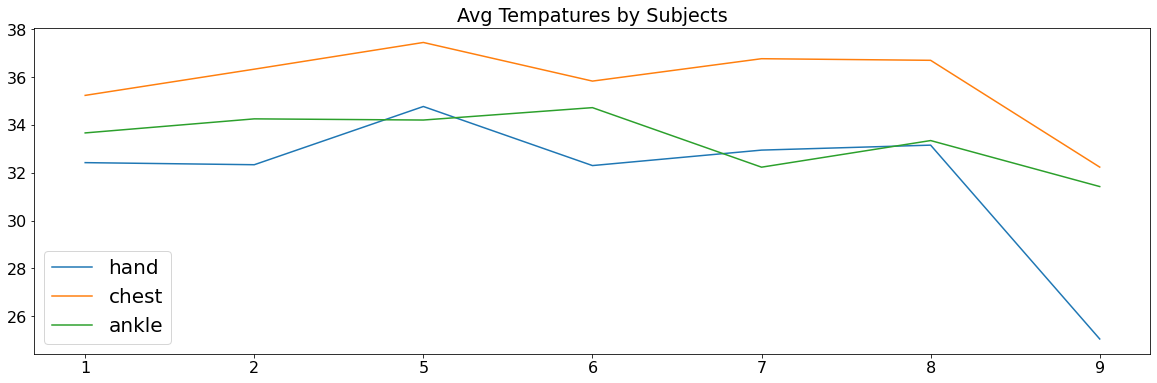

In [20]:
samepls_tempreture = pd.DataFrame()
samepls_tempreture['hand'] = result_id['handTemperature']
samepls_tempreture['chest'] = result_id['chestTemperature']
samepls_tempreture['ankle'] = result_id['ankleTemperature']

ax = samepls_tempreture.plot(kind='line', figsize=(20,6), title='Avg Tempatures by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls_tempreture)))


Subject 9's temperature is dropping in all samples from the hand, chest, and ankle, as well as in subject ID 6's hand and 7's ankle.

<ipython-input-21-510a5f7f69ac>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(samepls_tempreture['activity'])


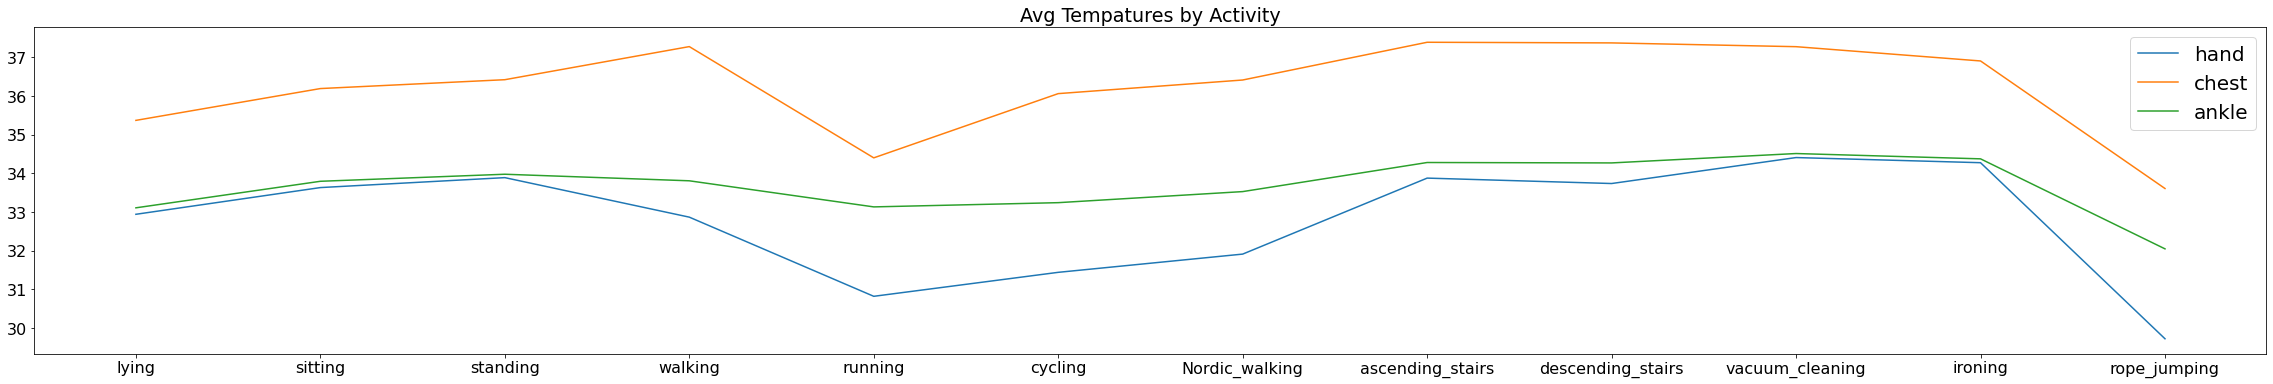

In [21]:
samepls_tempreture = pd.DataFrame()
samepls_tempreture['activity'] = [activityIDdict[x] for x in result_act['activityID']]
samepls_tempreture['hand'] = result_act['handTemperature']
samepls_tempreture['chest'] = result_act['chestTemperature']
samepls_tempreture['ankle'] = result_act['ankleTemperature']

ax = samepls_tempreture.plot(kind='line', figsize=(40,6), title='Avg Tempatures by Activity')
a = ax.set_xticklabels(samepls_tempreture['activity'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls_tempreture)))

Subject 9 has the lowest temperatures in all of the sections of the human body that were measured, while rope jumping has the lowest activity temperatures.

#### Sensor Analysis

<ipython-input-22-3f9cd2ea2a24>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['subject_id'])


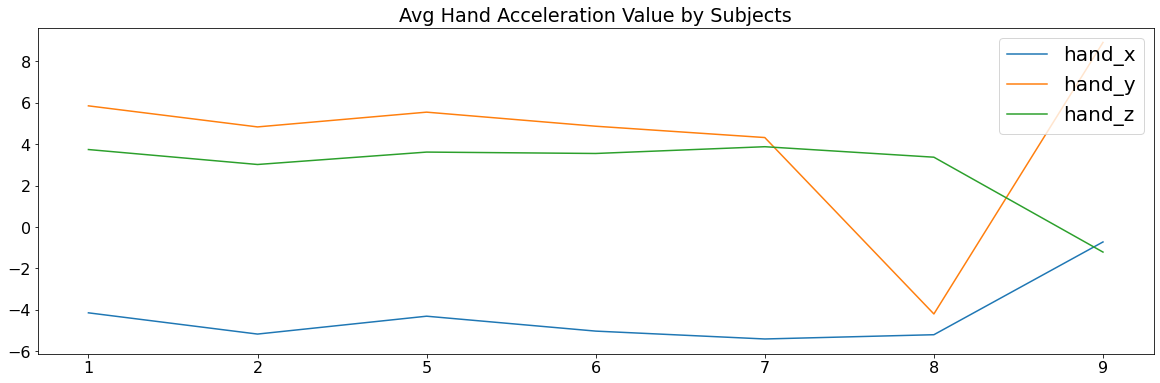

In [22]:
samepls = pd.DataFrame()
samepls['hand_x'] = result_id['handAcc16_1']
samepls['hand_y'] = result_id['handAcc16_2']
samepls['hand_z'] = result_id['handAcc16_3']
ax = samepls.plot(kind='line', figsize=(20,6), title='Avg Hand Acceleration Value by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls)))


Predicting the future by looking at the past: We can build new features based on existing ones. This is the sliding window of the lookback in the previous features in our scenario to anticipate the next value.
Predicting the past from the present: Similar to the last example, however this time the prediction is for the past rather than the future.
Adjusting the model to predict a simple target - In our situation, making the target as basic as possible to make it easier to anticipate, in this example, prediction of the future activity based on a set of variables.

In [23]:
train_df = data.sample(frac=0.8, random_state=1)
test_df = data.drop(train_df.index)

In [24]:
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_df.index)

In [25]:
train_df.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,...,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06,1.229690e+06
mean,1.780985e+03,8.189170e+00,1.085942e+02,3.297811e+01,-4.845089e+00,3.526807e+00,3.497053e+00,-4.772121e+00,3.507408e+00,3.692960e+00,...,-3.448349e-02,2.489437e-03,-3.293129e+01,1.765651e+00,1.742041e+01,4.113525e-01,1.430587e-02,3.046326e-01,-3.128679e-02,4.828150e+00
std,1.134047e+03,6.228876e+00,2.797713e+01,1.796219e+00,6.372615e+00,7.530541e+00,4.068541e+00,6.370794e+00,7.176980e+00,4.052650e+00,...,6.808965e-01,2.098050e+00,1.862930e+01,2.255820e+01,2.014418e+01,3.184858e-01,5.613273e-01,3.365982e-01,4.549148e-01,2.546684e+00
min,3.120000e+01,1.000000e+00,6.000000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.183480e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.726240e+02,-1.379080e+02,-1.027160e+02,1.521280e-06,-9.568760e-01,-8.759780e-01,-9.972810e-01,1.000000e+00
25%,7.589400e+02,3.000000e+00,8.700000e+01,3.187500e+01,-8.891240e+00,7.910008e-01,9.983435e-01,-8.777250e+00,7.965570e-01,1.202360e+00,...,-1.047950e-01,-5.015007e-01,-4.249200e+01,-1.346827e+01,3.509005e+00,1.572790e-01,-5.534235e-01,0.000000e+00,-4.955618e-01,2.000000e+00
50%,1.626995e+03,6.000000e+00,1.040000e+02,3.356250e+01,-5.238005e+00,3.548140e+00,3.325880e+00,-5.138600e+00,3.586550e+00,3.559620e+00,...,-2.094015e-03,-2.235150e-03,-3.493985e+01,1.963570e+00,1.812075e+01,3.222270e-01,0.000000e+00,3.053645e-01,0.000000e+00,5.000000e+00
75%,2.817790e+03,1.300000e+01,1.250000e+02,3.425000e+01,-5.902463e-01,6.602770e+00,6.476332e+00,-4.869172e-01,6.597843e+00,6.742440e+00,...,1.566057e-01,1.199638e-01,-1.872150e+01,1.928280e+01,3.248140e+01,5.907558e-01,6.145760e-01,5.930750e-01,4.318538e-01,7.000000e+00
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,1.316350e+01,1.652880e+01,9.155160e+01,9.369920e+01,1.469000e+02,1.000000e+00,9.595380e-01,9.499800e-01,9.961050e-01,9.000000e+00


We'll concentrate on heart rate because it's our most important metric for tracking participants during activities, as indicated by the different signals in the dataset's readme file. With that in mind, we can see from the table that the average heart rate across the dataset is 108.5. Furthermore, the minimum and highest heart rates are 50 and 202, respectively. The quartiles revealed can be further analysed by generating a box plot, which will help us comprehend our outliers and quartiles groups while also displaying the mean of our data's heart rate.

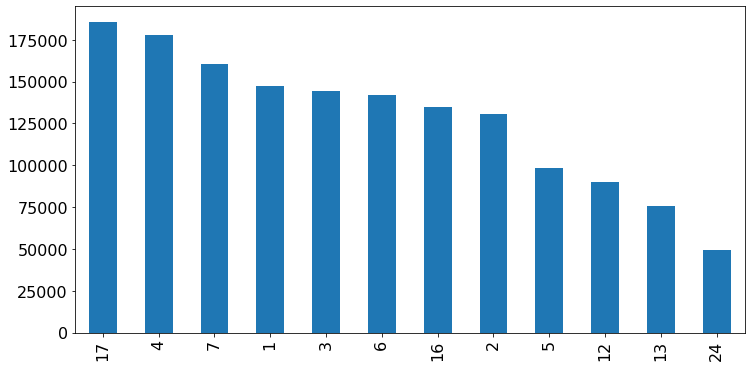

In [26]:
data['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.show()

Our classrooms are mostly balanced, as shown in the graph above. As a result, we divide the data into two sets: train and test. The split fraction that will be employed is an 80 percent split for train set and a 20% split for test set, which is the most prevalent split in the industry.

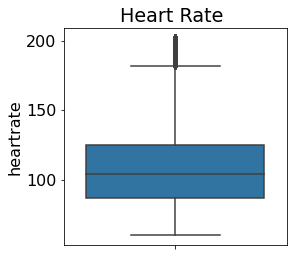

In [27]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Heart Rate ")
ax = sns.boxplot(y=train_df["heartrate"])

We can see from the box plot that the outliers have heart rates ranging from 180 to 202. Our highest quartile group of the four starts at 125, which is the end of the Inter-quartile range, and ends at 180, which also makes it our largest group when compared to the other quartiles on the box plot. Meaning that the majority of participants in the activities had a heart rate ranging from 125 to 180 beats per minute. Our third quartile group begins at the mean value of 108.5, which corresponds to the horizontal line in our box, and ends at the Inter-quartile range's end value of 125. Our second quartile group begins at 87 and ends at 125, which is the mean value of the Inter-quartile range. To determine which activities are the most taxing, we must create a bar chart that displays the mean heart rate values for each activity. As a result, we will be able to analyse more particular activity data. The names of the activities will be utilised to make the outcomes analysis easier.

<AxesSubplot:xlabel='activityID'>

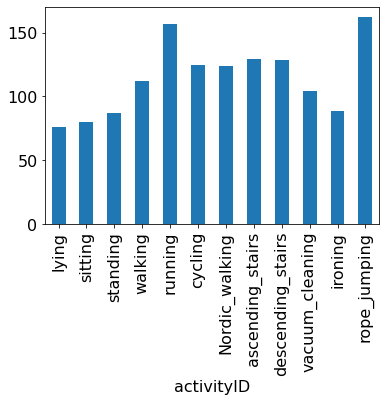

In [28]:
df_hr_act = train_df['heartrate'].groupby(train_df['activityID']).mean()
df_hr_act.index = df_hr_act.index.map(activityIDdict)
df_hr_act.plot(kind='bar')

A heat map is a graphical representation of data where individual values contained in a matrix are represented as colours. It gives us quick information through color patterns.You already know that if you have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

<ipython-input-29-409550941e6f>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)


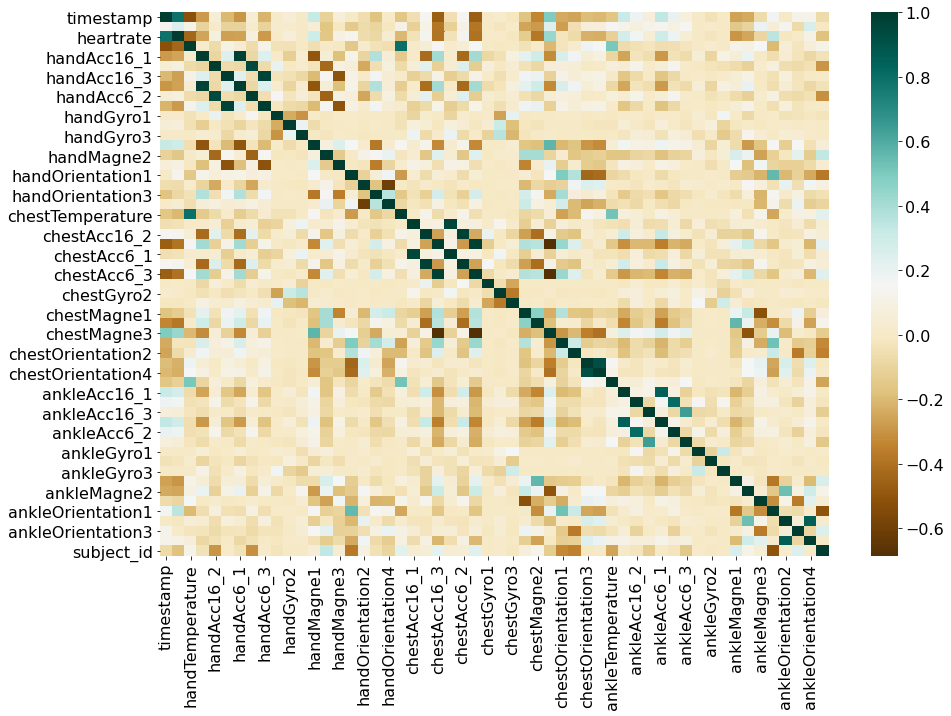

In [29]:
from pandas.plotting import scatter_matrix
df_corr = train_df.corr()
df_corr = df_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary of information.The seaborn library is built on top of Matplotlib. Seaborn library provides a high-level data visualization interface where we can draw our matrix. A heatmap is a plot of rectangular data as a color-encoded matrix. As parameter it takes a 2D dataset. That dataset can be coerced into an ndarray.This is a great way to visualize data, because it can show the relation between variabels including time. For instance, the number of fligths through the years.



Our heatmap depicts the degree of statistical similarity between our various columns. The gyroscopes do not correlate with any of our other data, and they appear to be unnecessary in our scenario.

On the other hand, we can comprehend the relationship between hand accelerometers and temperature. On all three cases of hand accelerometers, the two are highly associated.

Furthermore, the chest magnetometers appear to be linked to heart rate, which makes sense given how near they are on the body.

In [30]:
train_df

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
1248380,507.69,2,75.0,33.5000,-0.257331,8.25615,5.088720,-0.065106,8.20775,5.397030,...,0.134611,-0.008476,-17.7673,-3.995380,12.12970,0.161068,-0.733466,0.270488,-0.602429,6
1017092,1942.45,12,144.0,34.6250,-6.999180,2.65150,4.621770,-6.972130,2.69962,5.038640,...,2.610650,1.893120,-15.0637,-33.862300,14.86860,0.409950,-0.797127,0.096054,-0.432786,5
1052425,2295.78,4,116.0,34.4375,-11.264500,3.69848,3.399720,-11.437500,3.68191,3.546080,...,-0.371699,-3.306210,-40.7795,-5.374100,28.50280,0.145982,0.574220,0.637304,0.492752,5
2234885,3618.58,5,195.0,30.8125,-5.159950,-4.62029,-0.752872,-5.429130,-5.69825,-0.260006,...,0.317085,-0.383519,-43.7134,52.531300,12.39830,0.326887,0.589765,0.719080,0.168066,8
1286006,883.95,17,94.0,33.8125,-5.431990,7.26444,4.206320,-5.307610,7.61044,4.482550,...,0.022499,0.024311,-40.0879,22.047100,39.67820,0.194800,0.742885,0.169106,0.617720,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126484,1273.22,16,134.0,33.5625,6.184840,10.32210,4.177580,5.173180,9.64786,3.138500,...,-0.105623,-0.307932,17.5556,-9.054310,-9.69998,1.000000,0.000000,0.000000,0.000000,1
1789699,2302.74,4,104.0,33.0000,-13.284600,2.66754,0.909750,-14.451100,2.94594,0.757136,...,1.473260,-2.618100,-42.9973,-7.218120,20.55460,0.090480,0.555442,0.504172,0.655064,7
930874,1080.27,17,93.0,35.3750,-1.896090,7.57376,3.719420,-1.280720,6.58421,4.042760,...,0.442106,0.074144,-36.8616,10.569700,44.09960,0.091468,0.761769,0.198835,0.609759,5
354803,3556.41,24,175.0,30.1875,-2.640920,4.61611,-5.172350,-1.890110,5.82502,-5.030510,...,-0.706161,-3.939370,-47.9416,-34.076400,38.59500,1.000000,0.000000,0.000000,0.000000,1


mean value of the Activity ID and the Heart rate. Daily activities like sitting standing and laying has very less mean value of the heart rate like 75, 80,87. There are other additional excercises like running/ cycling/ rope jumping walking etc has better average mean value. 

In [31]:
runtime =  train_df.groupby('activityID')['heartrate'].mean()
runtime

activityID
1      75.906746
2      80.253864
3      87.014019
4     112.019717
5     156.619276
6     124.221481
7     123.530796
12    129.128067
13    128.404310
16    104.618869
17     88.532578
24    161.958167
Name: heartrate, dtype: float64

calculating the average heart rate for all subject IDs so that we can see who has the lowest heart rate and who has the highest heart rate

Some activities have comparable heart rates, such as 123,124,129, thus I'd want to compare any one of them to common household tasks, such as the one with the lowest heart rate.

In [32]:
cycling_data = train_df.loc[(train_df["activityID"] == 6)]
cycling_mean = (cycling_data)['heartrate'].mean()
cycling_mean

124.22148061667659

In [33]:
sitting_data = train_df.loc[(train_df["activityID"] == 2)]
sitting_mean = (sitting_data)['heartrate'].mean()
sitting_mean

80.25386388646461

### Hypothesis testing:

Hypothesis or significance testing is a mathematical model for testing a claim, idea or hypothesis about a parameter of interest in a given population set, using data measured in a sample set. Calculations are performed on selected samples to gather more decisive information about the characteristics of the entire population, which enables a systematic way to test claims or ideas about the entire dataset.

If the cycling/running/nordic walking have higher heart rate than other activities like sitting/standing then 
the average mean heart rate will be greater for cycling/running/nordic than for sitting/standing

If portion is proposed testable relationship.

The then-Portion is the predicted results from an experiment.

2 variables:
1)independent variable(controlled)[cause i.e physical activities]
2)dependent variable(observed)[effect i.e Heart rate]

Null hypothesis (H0)
The null hypothesis states that a population parameter (such as the mean, the standard deviation, and so on) is equal to a hypothesized value. The null hypothesis is often an initial claim that is based on previous analyses or specialized knowledge.

Alternative Hypothesis (H1)
The alternative hypothesis states that a population parameter is smaller, greater, or different than the hypothesized value in the null hypothesis. The alternative hypothesis is what you might believe to be true or hope to prove true.



###### Mean value 
             cycling   sitting
heart rate   124.22   |    80.25

Null Hypothesis : heart rate does not depend on the Pysical activities like cycling/running/nordic or sitting/standing
        
Alternative Hypothesis : People can conduct more physical activities than sitting/standing if the heart rate of physical activities is higher than sitting/standing.

In [34]:
from scipy import stats
heartrate_means=train_df.groupby('activityID')['heartrate'].mean()
heartrate_std=train_df.groupby('activityID')['heartrate'].std()
heartrate_count=train_df.groupby('activityID')['heartrate'].count()
combinederror=(((heartrate_std[6]**2)/heartrate_count[6])+((heartrate_std[2]**2)/heartrate_count[2]))**0.5   
z=(heartrate_means[6]-heartrate_means[2])/combinederror

p_value_from_normal_for_diff = (1-stats.norm.cdf(z))
print ('one_tail cycling and sitting activity difference: ', p_value_from_normal_for_diff)

one_tail cycling and sitting activity difference:  0.0


Because my testing's P value is 0.0, we can disregard the Null hypothesis value because it is less than 0.05. As a result, I would conclude that my alternative hypothesis, which states that people can engage in more physical activity than just sitting and standing in their everyday routine, is valid. The null hypothesis can be ruled out.

## Modelling

Data analysts build models for two basic reasons: to understand the past and to predict the future. One would like to understand how the data were generated, the relationships between variables, and any special structure that may exist in the data. The process of creating this understanding is often referred to as unsupervised learning. A more focused task is to build a prediction model, which allows one to predict the future value of a target variable as a function of the other variables at one’s disposal, and/or at a future time.

Some factors must be eliminated, which will have an impact on our modelling precision. The variables to be eliminated are timestamp and subject id, which are numeric numbers that our modelling technique would employ in its calculations, but their values have no relevance, therefore the modelling method would have noise and accuracy estimates would be inaccurate.

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [36]:
train_df = train_df.drop(["timestamp", "subject_id"],1)

In [37]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

scaler = RobustScaler()
df_scaled = train_df.copy()
df_scaled_test = test_df.copy()
df_scaled.iloc[:,1:41] = scaler.fit_transform(df_scaled.iloc[:,1:41])
df_scaled_test.iloc[:,1:41] = scaler.fit_transform(df_scaled_test.iloc[:,1:41])

df_scaled.head()

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
1248380,2,-0.763158,-0.026316,0.600009,0.810082,0.321804,0.611977,0.796582,0.331658,-0.008497,...,0.027696,0.134611,-0.008476,-17.7673,-3.99538,12.1297,0.161068,-0.733466,0.270488,-0.602429
1017092,12,1.052632,0.447368,-0.212164,-0.154280,0.236563,-0.221165,-0.152885,0.266967,-1.810634,...,1.678880,2.610650,1.893120,-15.0637,-33.86230,14.8686,0.409950,-0.797127,0.096054,-0.432786
1052425,4,0.315789,0.368421,-0.725997,0.025868,0.013479,-0.759789,0.016438,-0.002444,-0.955616,...,-3.955650,-0.371699,-3.306210,-40.7795,-5.37410,28.5028,0.145982,0.574220,0.637304,0.492752
2234885,5,2.394737,-1.157895,0.009403,-1.405498,-0.744571,-0.035044,-1.600473,-0.689453,5.507874,...,1.143400,0.317085,-0.383519,-43.7134,52.53130,12.3983,0.326887,0.589765,0.719080,0.168066
1286006,17,-0.263158,0.105263,-0.023369,0.639444,0.160723,-0.020386,0.693620,0.166591,-0.506819,...,0.014814,0.022499,0.024311,-40.0879,22.04710,39.6782,0.194800,0.742885,0.169106,0.617720


In [38]:

X_train = df_scaled.drop('activityID', axis=1).values
y_train = df_scaled['activityID'].values

# Test Dataset
X_test = df_scaled.drop('activityID', axis=1).values
y_test = df_scaled['activityID'].values

Usually, 90-98 percent of the variance will adequately explain our findings. So we could evaluate how many of those we could employ by displaying the variance ratio against the number of components. As shown in the graph below, 15 variables account for roughly 94 percent of the variance.

#### Logistic Regression:

Linear regression is a data science modeling technique that predicts a target variable. It completes this function by finding the “best” relationship between the independent and dependent variable. The resultant graph should ideally ensure that the sum of all the distances between the shape and the actual observation is small. The smaller the distance between the mentioned points, the smaller the chances of an error occuring.

Linear regression is further divided into the subtypes: simple linear regression and multiple linear regression. The former predicts the dependent variable using a single independent variable. Meanwhile, the latter uses the best linear relationship by using several independent variables to predict the dependent variable.

#### Logistic Regression Model without PCA

In [39]:
def get_metrics (y_true,y_pred):
    acc = accuracy_score(y_true, y_pred)
    err = 1-acc
    p = precision_score(y_true, y_pred,average=None).mean()
    r = recall_score(y_true, y_pred, average=None).mean()
    f1 = f1_score(y_true, y_pred, average=None).mean()
   
    print("Accuracy: ",acc)
    print("Error: ",acc)
    print("Precision", p)
    print("Recall", r)
    print("F1", f1)
    #print("Accuracy: %.3f \nError: %.3f \nPrecesion: %.3f \nRecall: %.3f \nF1:%.3f \n"% (acc,err,p,r,f1) )
    

log_reg1 = LogisticRegression(solver='lbfgs', max_iter=5000)
log_reg1.fit(X=X_train, y=y_train )
y_pred_lr = log_reg1.predict(X_test)
get_metrics(y_test, y_pred_lr)

/Users/pushpanb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.8681659605266367
Error:  0.8681659605266367
Precision 0.8449186866741621
Recall 0.8363732021119139
F1 0.8396724635808401


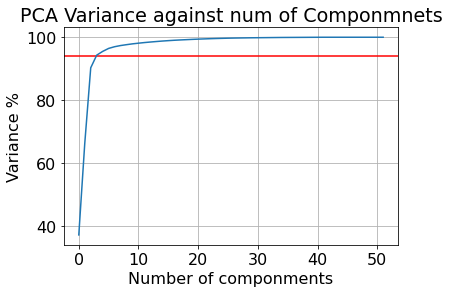

In [89]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation
Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data. Its behavior is easiest to visualize by looking at a two-dimensional dataset. One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels)

One of the oldest and most widely-used techniques to decide which are the most important dimensions of 
a dataset.Visualizing 2 or 3 dimensional data is not that challenging, You can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

In [90]:
pca = PCA(n_components=17)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

PCA (Principal Component Analysis) takes advantage of multicollinearity and combines the highly correlated variables into a set of uncorrelated variables. Therefore, PCA can effectively eliminate multicollinearity between features.When we have a lot of variables, we can reduce them using PCA

#### Logistic Regression Model with PCA

In [91]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_reg.fit(X=X_train, y=y_train )
y_pred_lr = log_reg.predict(X_test)
get_metrics(y_test, y_pred_lr)

Accuracy:  0.5037334612788589
Error:  0.5037334612788589
Precision 0.49540771004618683
Recall 0.45203820003761774
F1 0.45346971177025647


One of the weaknesses of PCA is that we won’t know which variables are the top predictors. To know the top predictors we will have to build the Linear Regression model without PCA. As we don’t use PCA, to reduce the number of variables. One of the advantages of PCA is that we don’t need to worry about multicollinearity in the data (highly correlated features).So on the first model, where I don’t use PCA, I have to handle the multicollinearity


#### Random Forest:

Random forest is one of the most popular algorithms for regression problems (i.e. predicting continuous outcomes) because of its simplicity and high accuracy. In this guide, we’ll give you a gentle introduction to random forest and the reasons behind its high popularity. It is perhaps the most popular and widely used machine learning algorithm given its good or excellent performance across a wide range of classification and regression predictive modeling problems. It is also easy to use given that it has few key hyperparameters and sensible heuristics for configuring these hyperparameters

Random forest is a bagging technique and not a boosting technique. The trees in random forests are run in parallel. There is no interaction between these trees while building the trees.
It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [92]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs =4)
rfc.fit(X_train,y_train)
y_pred_rf = rfc.predict(X_test)
get_metrics(y_test,y_pred_rf)

Accuracy:  0.9999796696728444
Error:  0.9999796696728444
Precision 0.9999816586958835
Recall 0.999983594688823
F1 0.9999826263562036


#### Decision Tree:

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.
    Decision Trees are divided into Classification and Regression Trees. Regression trees are needed when the response variable is numeric or continuous. Classification trees, as the name implies are used to separate the dataset into classes belonging to the response variable. This piece explains a Decision Tree Regression Model practice with Python.



In [93]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [48]:
# predict on the train and the test
preds = dt.predict(X_train)
print('Decision Tree Regressor accuracy on train: ', accuracy_score(y_train,preds)*100)
preds = dt.predict(X_test)
print('Decision Tree Regressor accuracy on test: ', accuracy_score(y_test,preds)*100)
preds = 0

Decision Tree Regressor accuracy on train:  100.0
Decision Tree Regressor accuracy on test:  100.0


#### Cross validation

Even though the aforementioned models appear to perform well, the metrics used to calculate them do not reflect the true score because the models were trained on a subset of the dataset. Using cross validation, we were able to obtain k=10 folds, or in other words, 10 separate samples. As a result, we will have ten separate metrics values. The average of these indicators will provide a more accurate picture of our model's performance.

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

classifiers = [LogisticRegression(solver='lbfgs', max_iter=5000),
               RandomForestClassifier(n_jobs =4)]

score_lst = []
for cls in classifiers:
    accs  = accuracy_score(y_train, cross_val_predict(cls,X_train,y_train,cv = 10))  #cross validate the accurancy 
    scores = cross_val_score(cls,X_train,y_train,scoring = "neg_mean_squared_error",cv= 10)#calcuate the error
    score = np.sqrt(-scores)
    f1 = cross_val_score(cls,X_test, y_test,scoring = "f1_macro", cv =10)
    
    
    #p = cross_val_score(cls,X_test, y_test,scoring = "average_precision", cv =10)
#     r = recall_score(y_true, y_pred, average=None).mean()
#     f1 = f1_score(y_true, y_pred, average=None).mean()
    score_lst.append([cls.__class__.__name__,accs,score.mean(), f1.mean()])

df_scores=pd.DataFrame(columns = ["Claasifier","Accurancy","MSE","F1"],data =  score_lst)
display(df_scores)

/Users/pushpanb/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,Claasifier,Accurancy,MSE,F1
0,LogisticRegression,0.503802,6.453249,0.453281
1,RandomForestClassifier,0.984418,0.961468,0.983012


As computing the results of the above cells took a long time, it is uploaded without the outputs but with the work and should be run by the examiner because the machine I am using has limited processing power.

Simple partitioning approach based on the idea of centroids
of group of elements.The centroid (middle) of any 
group of points in a 
Euclidean space can be 
found by taking the mean 
on every dimension.

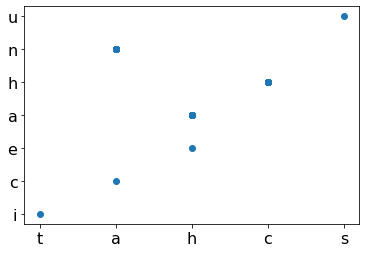

In [42]:
from sklearn import cluster
from collections import defaultdict

K=3 # specify number of clusters

cl_K3=cluster.KMeans(init='random',n_clusters=K)
cl_K3.fit(data)  

cl_K3.predict(data)

#In order to plot the clusters we need the co-ordinates of the points to be put in appropriate lists. One way is:

def divide(data,labels):
    xclusters=defaultdict(list)
    yclusters=defaultdict(list)
    for datapoint,label in zip(data,labels):
        x=datapoint[0]
        y=datapoint[1]
        xclusters[label].append(x)
        yclusters[label].append(y)
    return xclusters,yclusters    


clusters=divide(data,cl_K3.predict(data)) # apply the function that makes the data point lists to the predicted clusters

#plot a 2d scatter plots of the generated clusters - remember the data is 3d! (plot 3d if you want...)
plt.scatter(clusters[0][0],clusters[1][0])
plt.scatter(clusters[0][1],clusters[1][1])
plt.scatter(clusters[0][2],clusters[1][2])

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. These traits make implementing k-means clustering in Python reasonably straightforward, even for novice programmers and data scientists.The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.
The main element of the algorithm works by a two-step process called expectation-maximization. The expectation step assigns each data point to its nearest centroid. Then, the maximization step computes the mean of all the points for each cluster and sets the new centroid. 



### Conclusion

In this model, I'd like to conclude that a few activities, such as walking and running, as well as a few others, have similar samples collected and similar mean values. Few people are highly into fitness and perform all of the keep fit routines like rope jumping and so on, and there are a few examples where people merely do housework.When compared to intense exercise such as rope jumping, running, mounting stairs, etc., our heart rate will increase in accordance with our daily exercise routine, and high intensity exercise has low body temperature, according to the analysis.We estimated the correctness of future data using test and train data and several algorithms. There are certain disadvantages, such as those exercises that do not require hand movement but are nonetheless beneficial to one's health, such as yoga and Pilates. As a result, we must figure out how to account for them.We classified groups of comparable types using the k-means technique.